> # Modelo de Regresion Lineal Simple

- En este micro-proyecto se implementará un modelo de Regresión Lineal Simple. Se usará un conjunto de datos (dataset) relacionado a el consumo de combustible y la emision de Dioxido de Carbono en autos. 

- Para este micro-proyecto se dividirán los datos en *trainign set* y *test set*, luego finalmente usar el modelo para predecir valores desconocidos. 

> ### - Importando los paquetes necesarios

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

> ### - Dataset

El conjunto de datos usado tiene como nombre FuelConsumptionCo2.csv

> ### - Entendiendo los Datos

El dataset FuelConsumptionCo2.csv contiene puntuaciones del comsumo de combustible en modelos especificos y estimaciones de la emision de dioxido de carbono de nuevos vehiculos ligeros para la venta al por menor en Canada.
[Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-Coursera-20231514&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-Coursera-20231514&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-Coursera-20231514&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-Coursera-20231514&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)


> ### - Exploracion del Dataset

- Primeramente leemos los dataset con pandas y mostramos las primeras cinco filas de los datos.

In [2]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


- Hacemos una Exploración Descrptiva sobre nuestros datos 
- Resumiendo los datos

In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


- la funcion **describe()** de pandas nos muestra un resumen de las estadisticas descripticas del dataset incluyendo: la media, la mediana, maximo, minimo, std y conteo para todas las columnas. 

- Ahora seleccionaremos algunas *features* del dataset para explorar más, creando un nuevo objeto *cdf* 


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]


- Echemos un vistazo a los primeros 8  filas

In [7]:
cdf.head(8)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255


- Podemos graficar cada una de estas caracteristicas

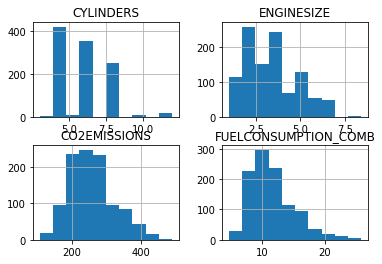

In [8]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

- Ahora, graficaremos cada una de estos atributos Vs. la Emission, para ver su relación lineal.

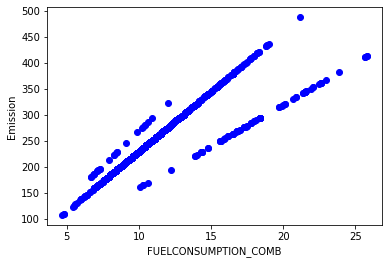

In [13]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

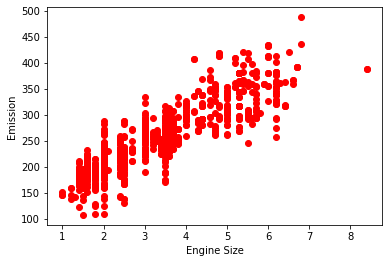

In [14]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='red')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

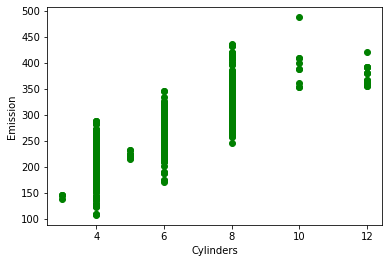

In [16]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='green')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

> ### - Creando el *train* y *test* *dataset*

- Separar *Train/Test* inplica dividir el dataset en entrenamiento y evaluacion respectivamente, los cuales son mutuamente exclusivo. Para luego entrenar al modelo con el conjunto de entrenamiento y evaluar con el conjunto de evaluación. Esto proporcionara una mejor presición en datos fuera de la muestra. 

- Presición porque el conjunto de datos de prueba no es parte del dataset que ha sido usado para entrenar los datos. Esto es más realista para problemas del mundo real.

- Vamos a separa nuestro dataset en conjuntos de train y test, 80% de los datos enteros para entrenamiento, y el 20% para pruebas. 

- Creamos una mascara para selección aleatoria de filas usando la funcion **np.random.rand()**:

In [17]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

> ### - **Modelo de Regresión Simple**

- La Regresion lineal ajusta un modelo lineal con coeficientes $\theta = (\theta_1, ..., \theta_n)$, para minimizar la 'suma residual de cuadrados' la cual es una técnica estadística utilizada para medir la cantidad de varianza en un conjunto de datos que no se explica mediante un modelo de regresión, haremos esto entre la variable independiente X en el dataset, y la variable dependiente Y por la aproximaxión lineal.

---

> ### - Distribución de los datos de entrenamiento

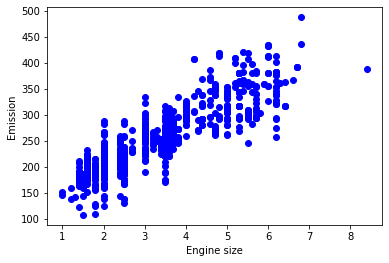

In [19]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

> ###  Modelando

- Usando la libreria *sklearn* para modelar los datos

- **LinearRegression** se ajusta a un modelo lineal con coeficientes **w = (w_1, ..., w_p)** para minimizar la suma residual de cuadrados entre los objetivos observados en el conjunto de datos y los objetivos predichos por la aproximación lineal. Matemáticamente resuelve un problema de la forma:

$\ min_ {w} || X w - y || _2 ^ 2$

In [24]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x,train_y)

# Los Coeficientes

print('Coefficients: ', regr.coef_)
print('Intercept: ',regr.intercept_)

Coefficients:  [[39.60732036]]
Intercept:  [123.77244049]


- Como se mencion antes, **Coeficiente** e **Intercept** en la Regresion lineal simple, son los parametros de un ajuste de linea. Dado que esto es una Regresion lineal simple, con solo 2 parametros, y conociendo que los parametros son la intersección y la pendiente de la linea, sklearn puede estimarlos directamente de nuestros datos.  

> ### - Graficando las Salidas

Podemos graficar el ajuste de linea sobre los datos:

Text(0, 0.5, 'Emission')

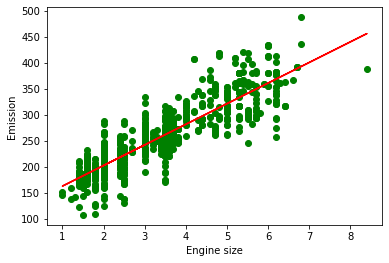

In [25]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

> ## - **Evaluación**

Se compararon los valores actuales y los valores predichos para calcular la presicion de un modelo de regresion. La *Evaluacion de metricas* provee un rol clave en el desarrollo de un modelo, como proporcionale informacion a areas que requieren mejoras.

Hay diferentes modelos de evaluacion de metricas, en este ejemplo usaremos MSE para calcular la presicion (accuracy) de nuestro modelo en el test set:

- Mean Squared Error (MSE): El Error Cuadrático Medio es el criterio de evaluación más usado para problemas de regresión. Se usa sobre todo cuando usamos aprendizaje automático supervisado. Para cada dato histórico podremos indicar el resultado correcto.



In [26]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 23.06
Residual sum of squares (MSE): 871.41
R2-score: 0.73


---

R^2 (coeficiente de determinación)función de puntuación de regresión.

La mejor puntuación posible es 1.0 y puede ser negativa (porque el modelo puede ser arbitrariamente peor).Un modelo constante que siempre predice el valor esperado de y,sin tener en cuenta las características de entrada,obtendría una puntuación R^2 de 0,0.